In [1]:
import timm
import torch
import torchvision
import random
from timm.data import resolve_data_config
from timm.data.transforms_factory import create_transform

random.seed(42)
split = 0.8

In [22]:
dataset_name = 'FGVCAircraft'
dataset_name = 'Flowers102'
dataset_name = 'Food101'
dataset_name = 'StanfordCars'
dataset_name = 'OxfordIIITPet'

In [23]:
from dataset import create_dataset

dataset_train = create_dataset(dataset_name, '.', True)
dataset_valid = create_dataset(dataset_name, '.', False)

In [24]:
len(dataset_train), len(dataset_valid)

(3680, 3669)

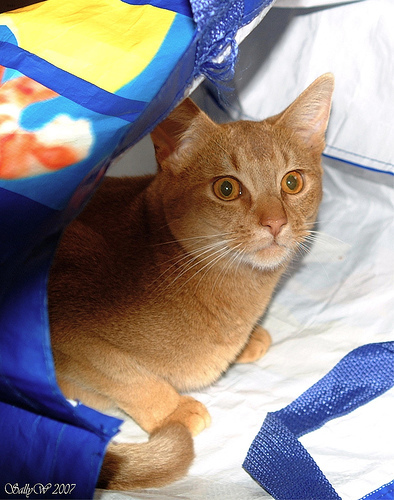

In [19]:
dataset_train[0][0]

In [6]:
model = timm.create_model('vit_base_patch16_224', pretrained=True)
model.eval()

VisionTransformer(
  (patch_embed): PatchEmbed(
    (proj): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
    (norm): Identity()
  )
  (pos_drop): Dropout(p=0.0, inplace=False)
  (blocks): Sequential(
    (0): Block(
      (norm1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
      (attn): Attention(
        (qkv): Linear(in_features=768, out_features=2304, bias=True)
        (attn_drop): Dropout(p=0.0, inplace=False)
        (proj): Linear(in_features=768, out_features=768, bias=True)
        (proj_drop): Dropout(p=0.0, inplace=False)
      )
      (drop_path): Identity()
      (norm2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
      (mlp): Mlp(
        (fc1): Linear(in_features=768, out_features=3072, bias=True)
        (act): GELU()
        (drop1): Dropout(p=0.0, inplace=False)
        (fc2): Linear(in_features=3072, out_features=768, bias=True)
        (drop2): Dropout(p=0.0, inplace=False)
      )
    )
    (1): Block(
      (norm1): LayerNorm((768,),

In [7]:
config = resolve_data_config({}, model=model)
transform = create_transform(**config)

In [8]:
config

{'input_size': (3, 224, 224),
 'interpolation': 'bicubic',
 'mean': (0.5, 0.5, 0.5),
 'std': (0.5, 0.5, 0.5),
 'crop_pct': 0.9}

In [9]:
transform

Compose(
    Resize(size=248, interpolation=bicubic, max_size=None, antialias=None)
    CenterCrop(size=(224, 224))
    ToTensor()
    Normalize(mean=tensor([0.5000, 0.5000, 0.5000]), std=tensor([0.5000, 0.5000, 0.5000]))
)

In [10]:
tensor = transform(dataset_train[0][0]).unsqueeze(0)
import torch
with torch.no_grad():
    out = model(tensor)
probabilities = torch.nn.functional.softmax(out[0], dim=0)
probabilities

tensor([3.5156e-05, 8.5775e-05, 1.0880e-05, 1.2250e-05, 3.9318e-05, 5.5320e-05,
        1.5736e-05, 5.0880e-05, 6.3691e-05, 1.9325e-05, 1.1153e-05, 1.0827e-05,
        1.8321e-05, 2.5831e-05, 2.2359e-05, 8.9044e-06, 5.7328e-06, 1.2744e-05,
        8.1895e-06, 7.0445e-06, 2.8769e-06, 1.8459e-05, 2.3554e-05, 1.4441e-05,
        1.7096e-05, 1.4793e-06, 2.1445e-06, 6.9983e-06, 1.5042e-06, 4.9919e-06,
        1.2955e-06, 2.8737e-06, 1.9151e-06, 1.7760e-05, 1.9469e-05, 3.5382e-06,
        1.5581e-05, 2.1580e-05, 5.8982e-06, 2.1214e-05, 1.4710e-05, 8.6852e-06,
        1.2806e-05, 9.7132e-06, 3.1176e-06, 1.2138e-05, 5.6131e-06, 1.5708e-05,
        9.3950e-06, 4.8650e-06, 1.9926e-06, 1.0030e-04, 1.0876e-05, 4.4836e-05,
        2.6788e-06, 8.8769e-06, 9.7502e-06, 5.4848e-06, 8.1787e-06, 3.7304e-06,
        2.7783e-05, 1.3536e-05, 3.6123e-06, 7.0252e-06, 9.3767e-06, 4.4117e-06,
        1.2200e-05, 9.9556e-06, 9.2766e-06, 2.5370e-05, 8.8342e-06, 4.8930e-06,
        2.3773e-06, 4.7418e-06, 4.1966e-

In [11]:
import urllib
url, filename = ("https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt", "imagenet_classes.txt")
urllib.request.urlretrieve(url, filename) 
with open("imagenet_classes.txt", "r") as f:
    categories = [s.strip() for s in f.readlines()]

# Print top categories per image
top5_prob, top5_catid = torch.topk(probabilities, 5)
for i in range(top5_prob.size(0)):
    print(categories[top5_catid[i]], top5_prob[i].item())


plastic bag 0.5431838631629944
Egyptian cat 0.22512422502040863
sleeping bag 0.031200263649225235
quilt 0.027733739465475082
mailbag 0.016974082216620445


In [12]:
timm.list_models('vit*', pretrained=True)

['vit_base_patch8_224',
 'vit_base_patch8_224_in21k',
 'vit_base_patch16_224',
 'vit_base_patch16_224_in21k',
 'vit_base_patch16_224_miil',
 'vit_base_patch16_224_miil_in21k',
 'vit_base_patch16_384',
 'vit_base_patch16_sam_224',
 'vit_base_patch32_224',
 'vit_base_patch32_224_in21k',
 'vit_base_patch32_384',
 'vit_base_patch32_sam_224',
 'vit_base_r50_s16_224_in21k',
 'vit_base_r50_s16_384',
 'vit_huge_patch14_224_in21k',
 'vit_large_patch16_224',
 'vit_large_patch16_224_in21k',
 'vit_large_patch16_384',
 'vit_large_patch32_224_in21k',
 'vit_large_patch32_384',
 'vit_large_r50_s32_224',
 'vit_large_r50_s32_224_in21k',
 'vit_large_r50_s32_384',
 'vit_small_patch16_224',
 'vit_small_patch16_224_in21k',
 'vit_small_patch16_384',
 'vit_small_patch32_224',
 'vit_small_patch32_224_in21k',
 'vit_small_patch32_384',
 'vit_small_r26_s32_224',
 'vit_small_r26_s32_224_in21k',
 'vit_small_r26_s32_384',
 'vit_tiny_patch16_224',
 'vit_tiny_patch16_224_in21k',
 'vit_tiny_patch16_384',
 'vit_tiny_r_s